In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt 

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = train.pop('label')
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.20, random_state = 42)
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = X_train.to_numpy() / 255.0
X_val = X_val.to_numpy() / 255.0
y = y_train.to_numpy()
y_val = y_val.to_numpy()

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


2022-07-19 17:58:41.427450: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.layers

In [10]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [11]:
batch_size = 64
epochs = 10

model.fit(X,y,batch_size = batch_size, validation_data=(X_val,y_val),epochs = epochs, shuffle = True, verbose=1)

2022-07-19 17:58:41.948235: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Epoch 1/10
525/525 [==============================] - 3s 5ms/step - loss: 0.3754 - accuracy: 0.8966 - val_loss: 0.2204 - val_accuracy: 0.9368
Epoch 2/10
525/525 [==============================] - 2s 4ms/step - loss: 0.1685 - accuracy: 0.9511 - val_loss: 0.1556 - val_accuracy: 0.9537
Epoch 3/10
525/525 [==============================] - 2s 4ms/step - loss: 0.1198 - accuracy: 0.9652 - val_loss: 0.1436 - val_accuracy: 0.9577
Epoch 4/10
525/525 [==============================] - 2s 4ms/step - loss: 0.0934 - accuracy: 0.9728 - val_loss: 0.1153 - val_accuracy: 0.9655
Epoch 5/10
525/525 [==============================] - 2s 4ms/step - loss: 0.0718 - accuracy: 0.9796 - val_loss: 0.1137 - val_accuracy: 0.9657
Epoch 6/10
525/525 [==============================] - 2s 4ms/step - loss: 0.0594 - accuracy: 0.9828 - val_loss: 0.1017 - val_accuracy: 0.9696
Epoch 7/10
525/525 [==============================] - 2s 4ms/step - loss: 0.0476 - accuracy: 0.9863 - val_loss: 0.1022 - val_accuracy: 0.9694
Epoch 

Creating a plot of accuraccy on the training and validation datasets over training epochs.
A plot of loss on the training and validation datasets over training epochs.

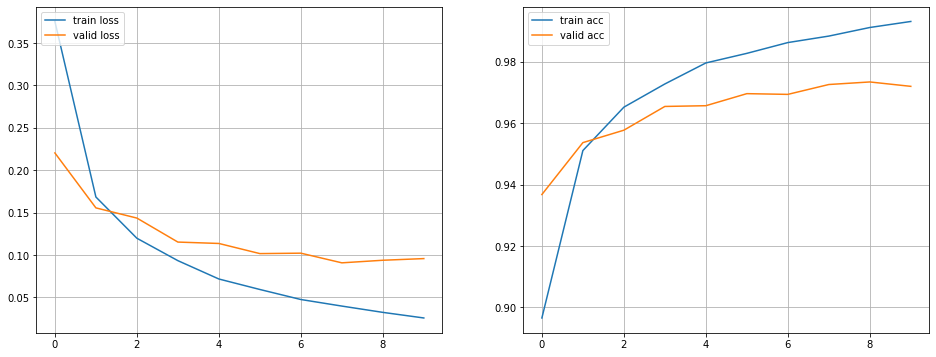

In [12]:
history = model.history 
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'],label = 'valid loss')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label = 'valid acc')
plt.legend(loc='upper left')
plt.grid()

In [13]:
plug = test.to_numpy()
plug

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
results = model.predict(test, batch_size = batch_size)
class_labels = np.argmax(results, axis=1)
submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submission['Label']=class_labels
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [15]:
submission.to_csv('submission.csv',index=False)